In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading wine.csv file
wines_df = pd.read_csv('wine.csv')

# Checking if file filters in
wines_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [2]:
# Removing the duplicate rows from the DataFrame
wines_df = wines_df.drop_duplicates()

# Reset the index after removing duplicates
wines_df.reset_index(drop=True, inplace=True)

In [3]:
# Checking nan values 
nan_count = wines_df.isnull().sum()
total_entries = wines_df.shape[0]  # Number of rows
print("NaN Counts:")
print(nan_count)
print(f"Total Data Entries: {total_entries}")

NaN Counts:
Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64
Total Data Entries: 1103


In [4]:
# Replaces NaN and 0 values in the 'price' column with the median price
wines_df['price'].replace({0: np.nan}, inplace=True)
wines_df['price'].fillna(wines_df['price'].median(), inplace=True)

In [5]:
# Showing column titles to see which ones could be removed
pd.set_option('display.max_columns', None)
print(wines_df.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


In [6]:
# list of columns to remove
columns_to_drop = ['Unnamed: 0', 'description', 'region_2']
wines_df = wines_df.drop(columns=columns_to_drop)

# Checking to see if the columns have been removed
wines_df.head()

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Br√ªlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la B√©gude


In [7]:
# Missing values to be categorised as unkown so the data as a whole can still be used   
wines_df['designation'] = wines_df['designation'].fillna('Unknown')

wines_df['region_1'] = wines_df['region_1'].fillna('Unknown')

# updating data
nan_count = wines_df.isnull().sum()

print(nan_count)
print(f"Total Data Entries: {total_entries}")

country        0
designation    0
points         0
price          0
province       0
region_1       0
variety        0
winery         0
dtype: int64
Total Data Entries: 1103


In [8]:
# Checking data types for categories including numerical values for points and price
data_types = wines_df.dtypes
print(data_types)

country         object
designation     object
points           int64
price          float64
province        object
region_1        object
variety         object
winery          object
dtype: object


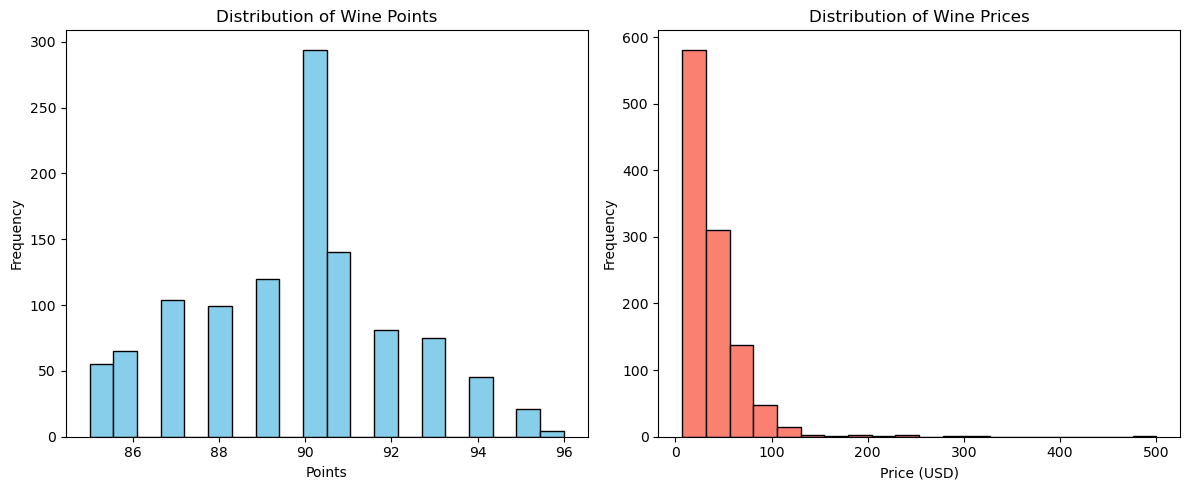

In [9]:
# Visualisations:

# Creating a figure with two subplots ('points' and 'price')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot a histogram for 'points'
axes[0].hist(wines_df['points'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Wine Points')
axes[0].set_xlabel('Points')
axes[0].set_ylabel('Frequency')

# Plot a histogram for 'price'
axes[1].hist(wines_df['price'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Wine Prices')
axes[1].set_xlabel('Price (USD)')
axes[1].set_ylabel('Frequency')

# Adjusting the spacing between subplots
plt.tight_layout()

# Show the graphs
plt.show()

#### The left graph shows the distribution of wines according to what points they are.
    The graph shows that as the points/ ratings of the wine increases so does the distribution up until a high of 90 points
    which has the highest frequency then declines as the ratings go higher.
    
    This can be useful to find the right market and aim at the points you would like to reach for the right distribution

#### The right graph shows the distribution of wines according to price
    The graph shows that as the price increases the distribution becomes less.
    
    This can be useful to find the right market price for distributing your wines, if you want to sell a lot of wines at a
    lower price or fewer at a larger price.

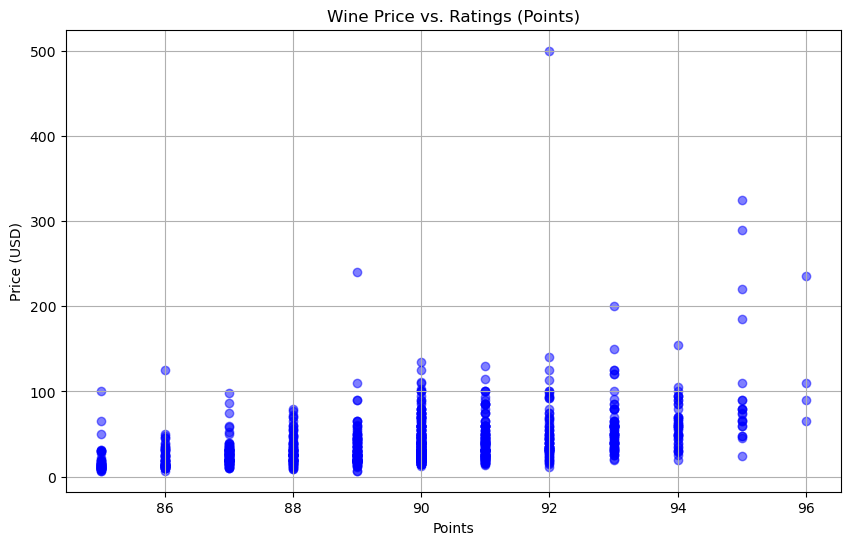

In [10]:
# Scatter plot of 'price' vs 'points'
plt.figure(figsize=(10, 6))
plt.scatter(wines_df['points'], wines_df['price'], alpha=0.5, color='blue')
plt.title('Wine Price vs. Ratings (Points)')
plt.xlabel('Points')
plt.ylabel('Price (USD)')
plt.grid(True)

# Showing the scatter plot
plt.show()

#### The graph shows the price of wines to the points it is rated by
    The graph shows an increases in price the more points the wine has, most of the wines stay within 100 USD however there
    are a few higher point wines that go beyond 150 USD
    
    This is useful to price your wine accordingly when gaining ratings from wines, a safe price for 86 - 88 points
    would be 10 - 80 USD or 90 - 92 points would be 10 - 140 USD

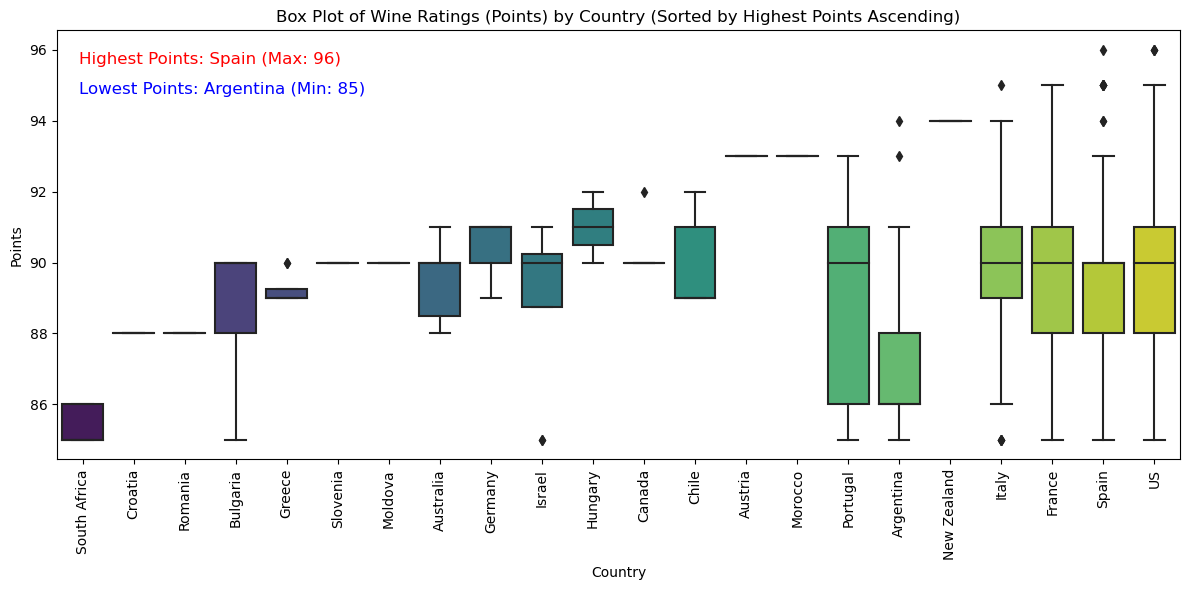

In [11]:
# highest and lowest points by country calculation
highest_points_country = wines_df.groupby('country')['points'].max().idxmax()
lowest_points_country = wines_df.groupby('country')['points'].min().idxmin()

# Box plot of 'points' by 'country' in ascending order of highest points
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='country', y='points', data=wines_df, palette='viridis',
                 order=wines_df.groupby('country')['points'].max().sort_values(ascending=True).index)
plt.title('Box Plot of Wine Ratings (Points) by Country (Sorted by Highest Points Ascending)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Points')

# showing the plot with the highest and lowest points countries (top left corner)
plt.text(0.02, 0.95, f'Highest Points: {highest_points_country} (Max: {wines_df.groupby("country")["points"].max().max()})',
         transform=ax.transAxes, ha='left', va='top', fontsize=12, color='red')
plt.text(0.02, 0.88, f'Lowest Points: {lowest_points_country} (Min: {wines_df.groupby("country")["points"].min().min()})',
         transform=ax.transAxes, ha='left', va='top', fontsize=12, color='blue')

plt.tight_layout()

# Showing the graph
plt.show()

#### The graph shows a box plot of wine points by country
    The graph shows that spain has the highest rated wines with a max of 96
    
    This is beneficial for knowing which countries make the best rated wine for consumers and distributers and their market.

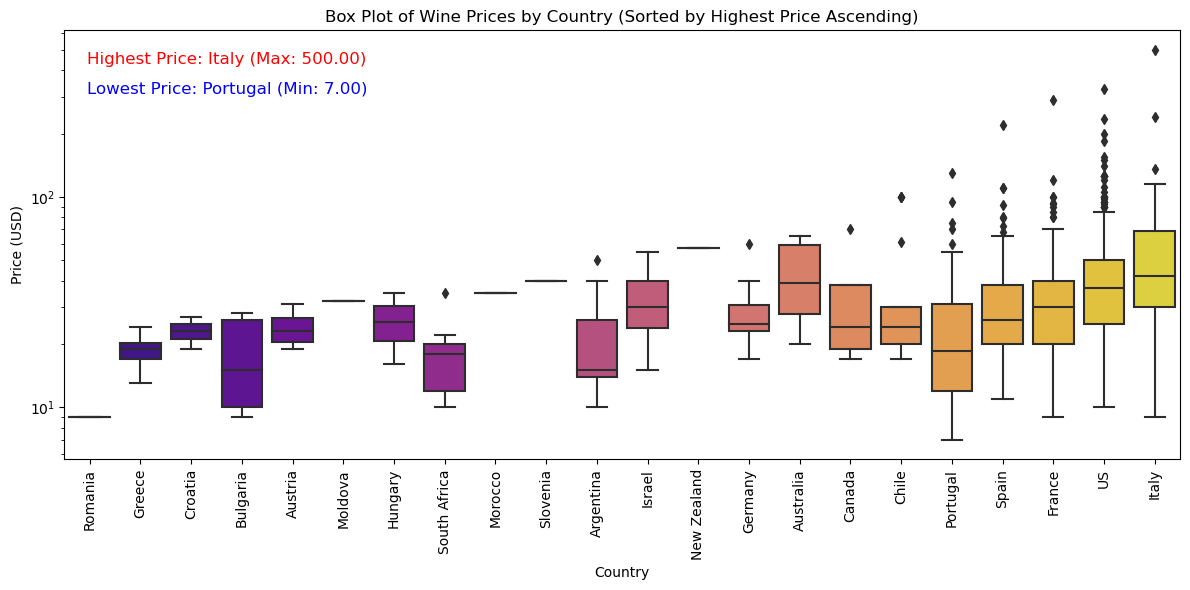

In [12]:
# Highest and lowest prices by country calculations
highest_price_country = wines_df.groupby('country')['price'].max().idxmax()
lowest_price_country = wines_df.groupby('country')['price'].min().idxmin()

# Box plot of 'price' by 'country' in ascending order of highest price
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='country', y='price', data=wines_df, palette='plasma',
                 order=wines_df.groupby('country')['price'].max().sort_values(ascending=True).index)
plt.title('Box Plot of Wine Prices by Country (Sorted by Highest Price Ascending)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Price (USD)')
plt.yscale('log')  # Use a logarithmic scale for better visibility

# showing the plot with the highest and lowest prices countries (top left corner)
plt.text(0.02, 0.95, f'Highest Price: {highest_price_country} (Max: {wines_df.groupby("country")["price"].max().max():.2f})',
         transform=ax.transAxes, ha='left', va='top', fontsize=12, color='red')
plt.text(0.02, 0.88, f'Lowest Price: {lowest_price_country} (Min: {wines_df.groupby("country")["price"].min().min():.2f})',
         transform=ax.transAxes, ha='left', va='top', fontsize=12, color='blue')

plt.tight_layout()

# Show the box plot
plt.show()

#### The graph shows a box plot of wine price by country
    The graph shows that Italy has the highest priced wines with a max of 500 USD
    
    This is beneficial for knowing which countries make the highest priced wines for consumers and distributers and
    their market.

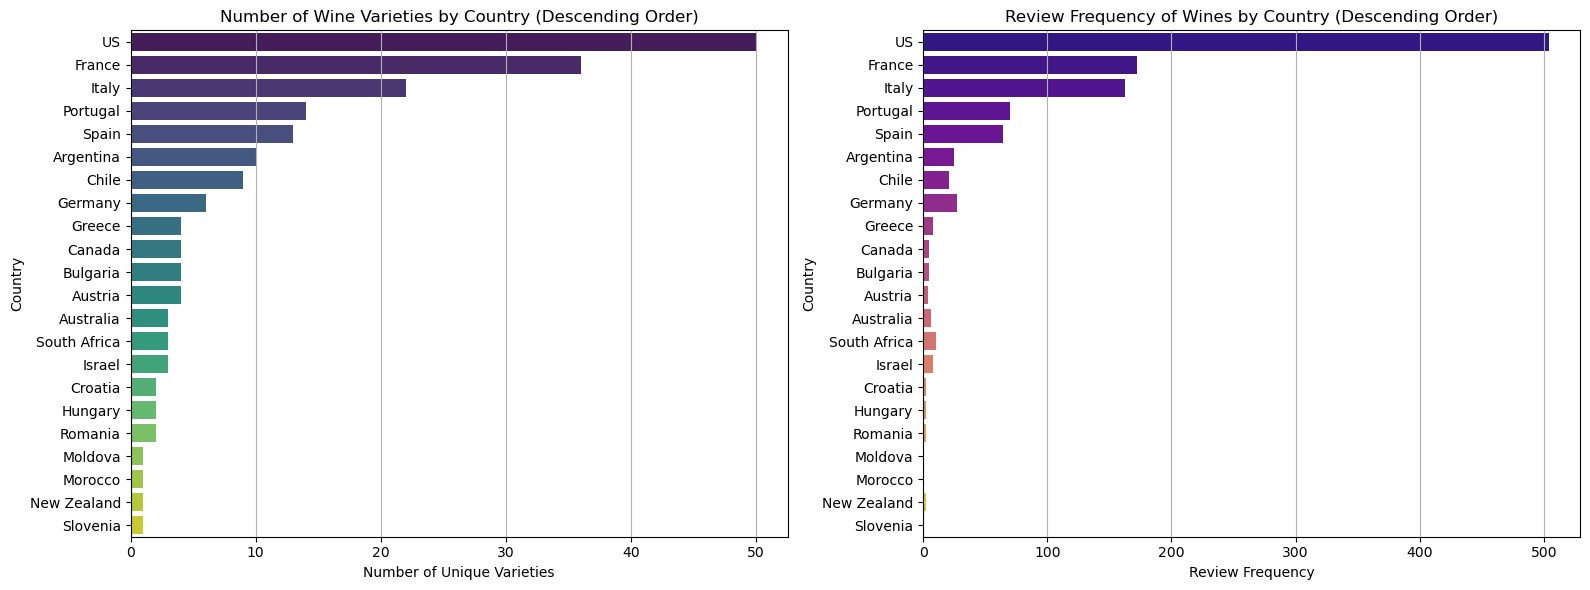

In [13]:
# Number of unique wine varieties in each country
variety_count_by_country = wines_df.groupby('country')['variety'].nunique().reset_index()

# Frequency of wines (reviews) in each country
wine_frequency_by_country = wines_df['country'].value_counts().reset_index()
wine_frequency_by_country.columns = ['country', 'frequency']

# Sort both DataFrames by the number of unique varieties in descending order
variety_count_by_country = variety_count_by_country.sort_values(by='variety', ascending=False)
wine_frequency_by_country = wine_frequency_by_country.sort_values(by='frequency', ascending=False)

# Extract the sorted country order
country_order = variety_count_by_country['country']

# Figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the number of unique varieties on the left subplot
sns.barplot(x='variety', y='country', data=variety_count_by_country, palette='viridis', ax=axes[0], order=country_order)
axes[0].set_title('Number of Wine Varieties by Country (Descending Order)')
axes[0].set_xlabel('Number of Unique Varieties')
axes[0].set_ylabel('Country')
axes[0].grid(axis='x')

# Plot the review frequency on the right subplot
sns.barplot(x='frequency', y='country', data=wine_frequency_by_country, palette='plasma', ax=axes[1], order=country_order)
axes[1].set_title('Review Frequency of Wines by Country (Descending Order)')
axes[1].set_xlabel('Review Frequency')
axes[1].set_ylabel('Country')
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

#### The graphs show a bar plot of the number of varieties in each country and the number of frequent wines in each country.
    The graphs shows that US has the most variety and also the most frequent wines, there is a clear indication that the 
    more variety in a country the more frequency of wines.
    
    This is beneficial for Wineries and wine distributors as they can use this data to make strategic decisions about which
    countries to target for exports or marketing campaigns and can help wineries assess their competition and make informed
    decisions about pricing, sales & marketing, and distribution.

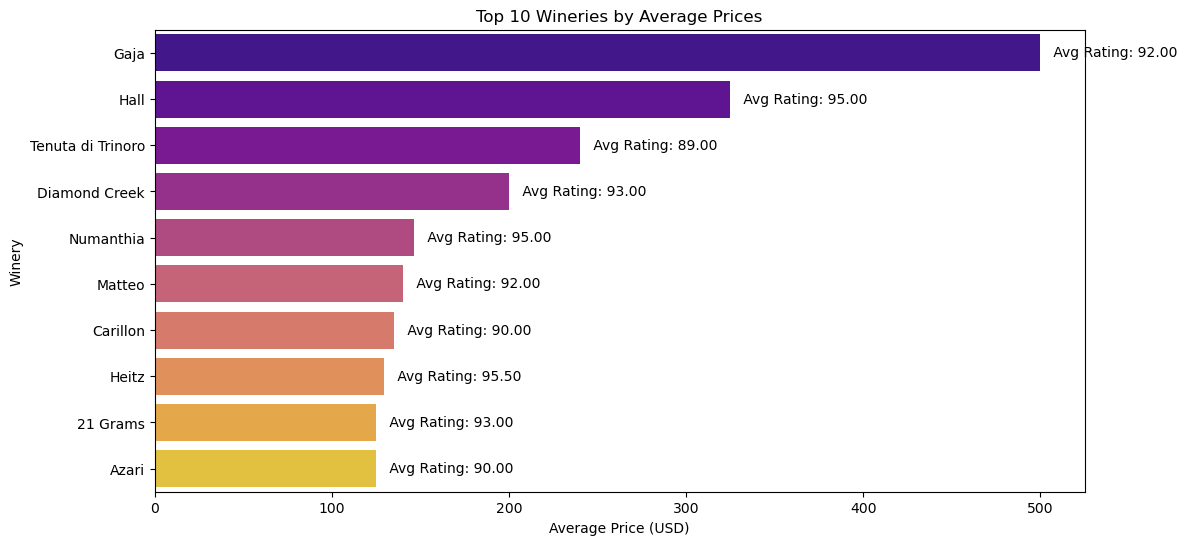

In [14]:
# Group by winery and calculate the average price and rating (points)
winery_summary = wines_df.groupby('winery').agg({'price': 'mean', 'points': 'mean'}).reset_index()

# Sort wineries by average price in descending order
winery_summary = winery_summary.sort_values(by='price', ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='price', y='winery', data=winery_summary.head(10), palette='plasma')
plt.title('Top 10 Wineries by Average Prices')
plt.xlabel('Average Price (USD)')
plt.ylabel('Winery')

# Add average ratings to the end of each bar
for i, row in enumerate(winery_summary.head(10).itertuples()):
    ax.text(row.price + 5, i, f' Avg Rating: {row.points:.2f}', va='center', fontsize=10, color='black')

plt.show()

#### The graphs show a bar plot of the highest top 10 average price wineries and the average rating of each as well
    The graphs shows that Gaja has the highest average price with a high average rating but not the highest
    
    This is beneficial for investors or customers when buying and investing in wineries

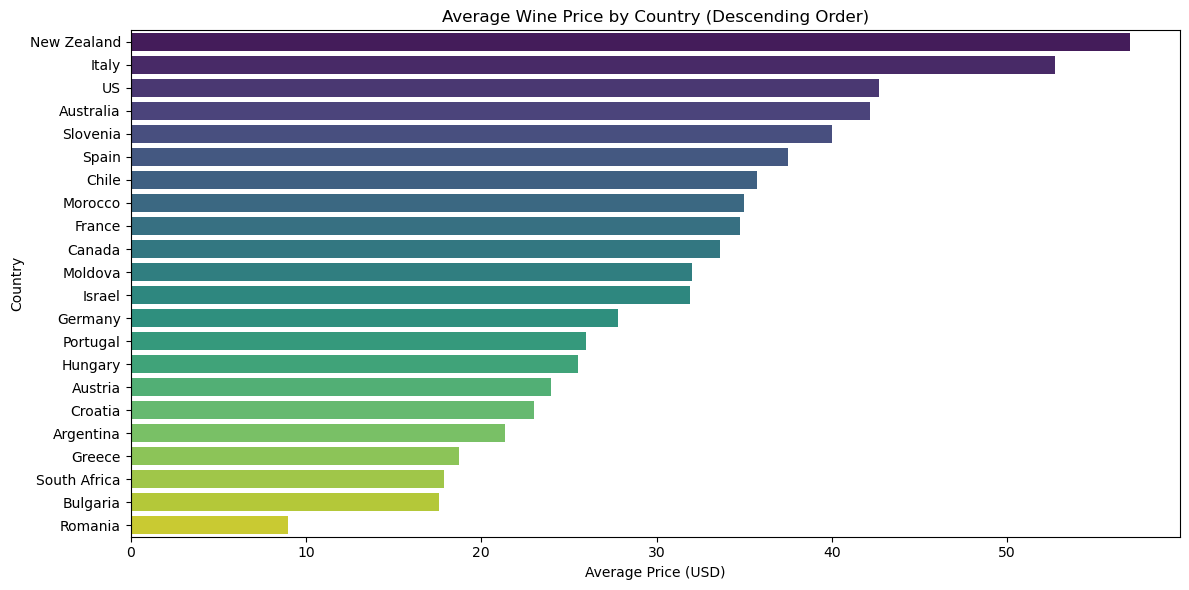

In [15]:
# Group by 'country' and calculate the average price per country
average_price_by_country = wines_df.groupby('country')['price'].mean().reset_index()

# Sort the DataFrame by average price in descending order
average_price_by_country = average_price_by_country.sort_values(by='price', ascending=False)

# Bar plot to visualize the average prices by country
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='country', data=average_price_by_country, palette='viridis')
plt.title('Average Wine Price by Country (Descending Order)')
plt.xlabel('Average Price (USD)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

#### The graphs show a bar plot of the average wine price per country
    The graphs shows that New Zealand has the highest average price and Romania the lowest
    
    Understanding regional variations in wine prices can help wineries better understand their target consumers.

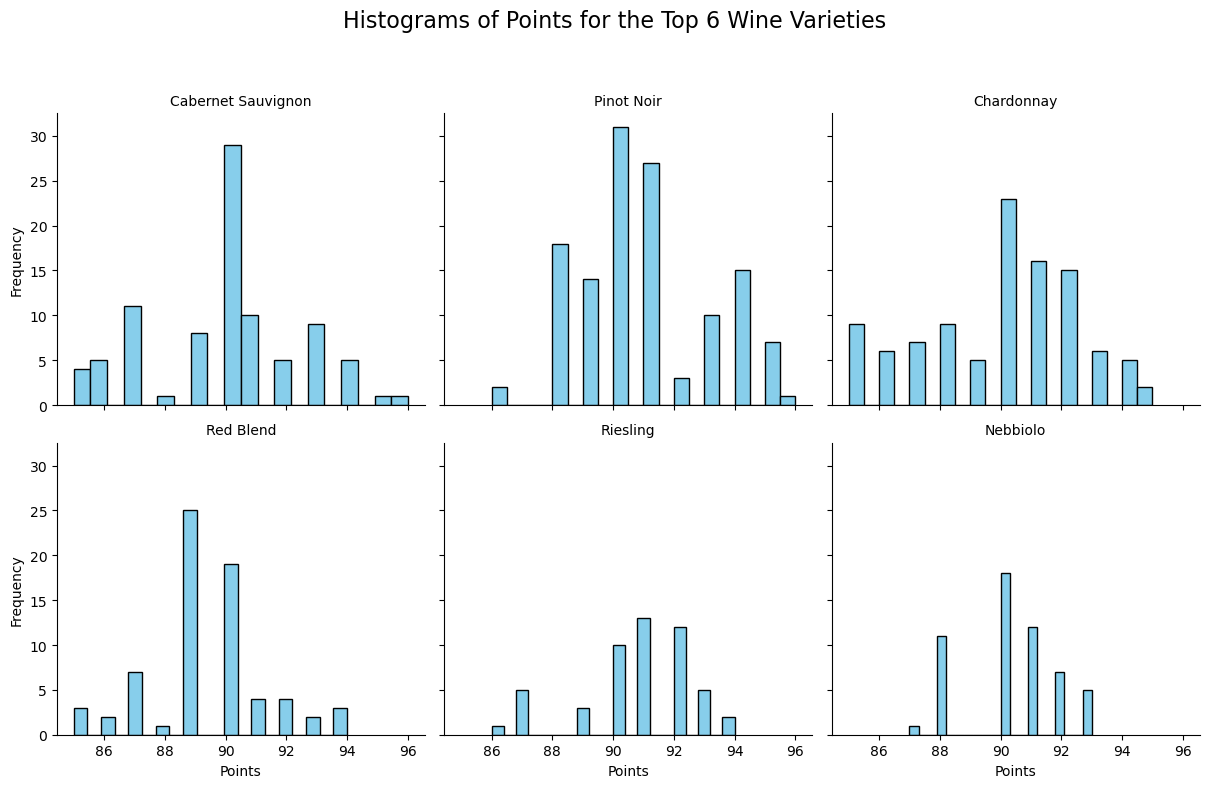

In [16]:
# Top 6 most common wine varieties
top_varieties = wines_df['variety'].value_counts().head(6).index.tolist()

# Filter the dataset to include only top 6 varieties
filtered_df = wines_df[wines_df['variety'].isin(top_varieties)]

# Create a FacetGrid for the top 6 wine varieties
g = sns.FacetGrid(filtered_df, col='variety', col_wrap=3, height=4)

# Map a histogram plot of the "points" column for each variety
g.map(plt.hist, 'points', bins=20, color='skyblue', edgecolor='black')
g.set_axis_labels('Points', 'Frequency')

# Set titles for each subplot
g.set_titles("{col_name}")

# Add a title for the entire grid
g.fig.suptitle('Histograms of Points for the Top 6 Wine Varieties', fontsize=16)

# Adjust spacing between subplots
plt.subplots_adjust(top=0.85)

# Show the grid
plt.show()

#### The graphs show a multi-plot grid of the frequency of the top 6 varieties by points
    The graphs show that there is more frequency in pinot Noir
    
    This is useful for investors and business owners to choose which varieties to make their wine from and which ones make 
    the best rated wines.